In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/MSc_Project/neural_xc_playground/

/content/drive/MyDrive/MSc_Project/neural_xc_playground


In [ ]:
#!git clone https://github.com/semodi/neuralxc.git

Cloning into 'neuralxc'...
remote: Enumerating objects: 3318, done.
remote: Counting objects: 100% (1510/1510), done.
remote: Compressing objects: 100% (684/684), done.
remote: Total 3318 (delta 989), reused 1251 (delta 792), pack-reused 1808
Receiving objects: 100% (3318/3318), 19.38 MiB | 14.36 MiB/s, done.
Resolving deltas: 100% (2033/2033), done.
Checking out files: 100% (267/267), done.


In [3]:
cd neuralxc/

/content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc


## Install

In [4]:
!sh install.sh

  Cloning https://github.com/semodi/libnxc.git (to revision 9c3b895840a000968866a44841291926fe29aab7) to /tmp/pip-req-build-n0r78w81
  Running command git clone -q https://github.com/semodi/libnxc.git /tmp/pip-req-build-n0r78w81
  Running command git checkout -q 9c3b895840a000968866a44841291926fe29aab7
     |████████████████████████████████| 1.8MB 5.0MB/s 
     |████████████████████████████████| 2.8MB 29.2MB/s 
     |████████████████████████████████| 204kB 39.2MB/s 
     |████████████████████████████████| 696kB 34.9MB/s 
     |████████████████████████████████| 5.4MB 38.3MB/s 
     |████████████████████████████████| 184kB 45.9MB/s 
     |████████████████████████████████| 29.7MB 1.8MB/s 
     |████████████████████████████████| 245kB 41.9MB/s 
  Created wheel for periodictable: filename=periodictable-1.6.0-cp37-none-any.whl size=749750 sha256=284cba5d9cae2d44eb6c45c8881d4cac1fd6c1d01d7fa601db435247b3ebd741
  Stored in directory: /root/.cache/pip/wheels/eb/78/08/4cb95d4ae156e978980596c1f25

In [ ]:
pwd

'/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc'

In [ ]:
cd ..

/content/drive/My Drive/MSc_Project/neural_xc_playground


In [ ]:
ls

neuralxc/      test_neural_XC_2.ipynb    test_projector_nn.ipynb
neuralxc_old/  test_neural_XC.ipynb
pre.json       test_neural_XC_new.ipynb


In [5]:
import pyscf

In [6]:
from pyscf import dft, gto

In [7]:
import numpy as np

In [8]:
mol = gto.M(atom='O  0  0  0; H  0 1 0 ; H 0 0 1', basis='6-31g*')
mf = dft.RKS(mol)
mf.xc = 'PBE'
mf.grids.level = 3
mf.kernel()

converged SCF energy = -76.3154747149681


-76.31547471496809

In [9]:
rho = pyscf.dft.numint.get_rho(mf._numint, mol, mf.make_rdm1(), mf.grids)

In [24]:
rho

array([2.91089561e+02, 2.91063025e+02, 2.90911157e+02, ...,
       1.88899499e-03, 1.82087871e-03, 1.82087871e-03])

In [11]:
rho.shape #(29193, )

(29193,)

In [12]:
 mf.grids.weights #(29193,)

array([1.39057893e-13, 4.54432003e-12, 5.39245502e-11, ...,
       4.74191911e-02, 5.59911427e-02, 5.59911427e-02])

In [13]:
mf.grids.coords #(29193, 3)

array([[ 8.16664970e-05,  0.00000000e+00,  0.00000000e+00],
       [ 2.98885715e-04,  0.00000000e+00,  0.00000000e+00],
       [ 7.50353928e-04,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.53740746e+00,  1.16059666e+00,  1.54288794e+00],
       [ 2.53740746e+00, -1.16059666e+00,  1.54288794e+00],
       [-2.53740746e+00, -1.16059666e+00,  1.54288794e+00]])

In [12]:
import sys
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [13]:
sys.path.append('/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/')

In [ ]:
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/']

In [ ]:
import neuralxc as xc

In [ ]:
import neuralxc.ml.utils

In [16]:
from neuralxc.projector import DensityProjector

ModuleNotFoundError: ignored

In [25]:
density_projector = DensityProjector(grid_coords=mf.grids.coords, grid_weights=mf.grids.weights,
                                                  basis_instructions={'application':'pyscf','basis': {'O': {'n': 2, 'l': 3, 'r_o': 1}, 'H': {'n': 2, 'l': 2, 'r_o': 1.5}},
                    'projector': 'ortho', 'grid' : 'radial'})

TypeError: ignored

In [2]:
!pip install pyscf

     |████████████████████████████████| 29.7MB 196kB/s 


In [4]:
import pyscf
from pyscf import dft, gto

In [8]:
import neuralxc as xc

In [9]:
mol = gto.M(atom='O  0  0  0; H  0 1 0 ; H 0 0 1', basis='6-31g*')
mf = dft.RKS(mol)
mf.xc = 'PBE'
mf.kernel()
rho = pyscf.dft.numint.get_rho(mf._numint, mol, mf.make_rdm1(), mf.grids)
print('Rho shape', rho.shape)
print('Weights shape', mf.grids.weights.shape)

converged SCF energy = -76.3154747149681
Rho shape (29193,)
Weights shape (29193,)


In [14]:
basis_instructions = {
  "preprocessor":
  {
       "basis": "ccpvtz-jkfit",
       "projector": "gaussian",
       "grid": "radial",
       "extension": "chkpt"
  },
  "n_workers" : 1,
  "engine": {"xc": "PBE",
             "application": "pyscf",
             "basis" : "def2-TZVP"}

}

In [16]:
 density_projector = xc.projector.RadialProjector(grid_coords=mf.grids.coords, grid_weights=mf.grids.weights,
                                                   basis_instructions=basis_instructions)

In [18]:
 density_projector()

TypeError: ignored

In [26]:
!neuralxc fit -h

usage: neuralxc fit [-h] [--hdf5 hdf5 hdf5 hdf5] [--sets sets]
                    [--sample sample] [--model model] [--hyperopt]
                    preprocessor hyper

Fit a NeuralXC model

positional arguments:
  preprocessor          Path to configuration file for preprocessor
  hyper                 Path to .json configuration file setting
                        hyperparameters

optional arguments:
  -h, --help            show this help message and exit
  --hdf5 hdf5 hdf5 hdf5
                        Path to hdf5 file, baseline data, reference data
  --sets sets           Path to file defining sets
  --sample sample       Only use a subsample of data contained in hdf5 file
  --model model         Continue training model found at this location
  --hyperopt            Do a hyperparameter optimzation


'/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc'

In [28]:
cd examples/quickstart/

/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/quickstart


In [30]:
ls sc/

best_model/       data.hdf5   model_it1.jit/  pre.json        statistics_sc
best_params.json  hyper.json  model_it2/      sets.inp        workdir/
cv_results.csv    model_it1/  model_it2.jit/  statistics_fit


In [58]:
from neuralxc.ml.utils import load_sets, load_data

In [32]:
import h5py

In [63]:
f = h5py.File('sc/data.hdf5')

In [55]:
f['system/it0/density/97a66c91908d8f76f249705362d9e536'][:, :]

array([[8.6250252 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [8.61334309, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [8.61657682, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [8.61548783, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [8.6108232 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [8.61684568, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [42]:
f.close()

In [66]:
X,y = load_data(h5py.File('sc/data.hdf5'), 'system/it0', 'system/ref', '97a66c91908d8f76f249705362d9e536',E0=0)

In [68]:
np.shape(X)

(10, 525)

In [69]:
np.shape(y)

(10,)

In [70]:
loaded_data = load_sets(h5py.File('sc/data.hdf5'), 'system/it0', 'system/ref', basis_key='97a66c91908d8f76f249705362d9e536')

In [72]:
np.shape(loaded_data)

(10, 527)

In [74]:
np.shape(loaded_data[0])

(527,)

In [ ]:
from neuralxc.symmetrizer.symmetrizer import 

In [ ]:
!pip install -U pytest #update pytest

     |████████████████████████████████| 286kB 15.4MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Found existing installation: pytest 3.6.4
    Uninstalling pytest-3.6.4:
      Successfully uninstalled pytest-3.6.4


In [ ]:
!pytest -v

============================= test session starts ==============================
platform linux -- Python 3.7.10, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc
plugins: cov-2.12.1, typeguard-2.7.1
collected 29 items                                                             

neuralxc/tests/test_drivers.py::test_fit PASSED                          [  3%]
neuralxc/tests/test_drivers.py::test_eval PASSED                         [  6%]
neuralxc/tests/test_drivers.py::test_data PASSED                         [ 10%]
neuralxc/tests/test_drivers.py::test_serialize PASSED                    [ 13%]
neuralxc/tests/test_neuralxc.py::test_siesta_density_getter PASSED       [ 17%]
neuralxc/tests/test_neuralxc.py::test_formatter PASSED                   [ 20%]
neuralxc/tests/test_neuralxc.py::test_grouped_transformers[transformer0-/content/drive/MyDrive/MSc_Project/neural_xc_playground/neu

In [ ]:
import copy
import os
import shutil
import sys
from abc import ABC, abstractmethod

import dill as pickle
import json
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pytest
from ase.io import read

import neuralxc as xc
from neuralxc.constants import Bohr, Hartree
from neuralxc.drivers import *
from neuralxc.engines import Engine
from neuralxc.utils import ConfigFile

In [ ]:
os.chdir('neuralxc/tests/driver_data_tmp')

In [ ]:
serialize('model', 'benzene.pyscf.jit', as_radial=False)

Using symmetrizer  casimir
Success!


In [ ]:
engine = Engine('pyscf', nxc='benzene.pyscf.jit')
atoms = engine.compute(read('benzene_small.traj', '0'))

Re-using results


In [ ]:
 atoms.get_potential_energy()

-6311.410418033626

In [ ]:
serialize('model', 'benzene.pyscf_radial.jit', as_radial=True)
engine = Engine('pyscf', nxc='benzene.pyscf_radial.jit')
atoms_rad = engine.compute(read('benzene_small.traj', '0'))

Using symmetrizer  casimir
Using symmetrizer  casimir
Success!
Re-using results


In [ ]:
 atoms_rad.get_potential_energy()

-6311.410418033626

In [ ]:
cd ../../../

/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc


In [ ]:
ls examples/inputs/ml_basis

basis_mob_ml.json         basis_sgdml_malonaldehyde.json
basis_nxcw01.json         basis_sgdml_toluene.json
basis_sgdml_benzene.json  basis_sgdml_water.json
basis_sgdml_ethanol.json


##Command - neuralxc help

In [ ]:
!neuralxc --help

usage: neuralxc [-h]
                {basis,data,fit,sc,eval,predict,serialize,pre,default,engine}
                ...

Add data to hdf5 file

positional arguments:
  {basis,data,fit,sc,eval,predict,serialize,pre,default,engine}

optional arguments:
  -h, --help            show this help message and exit


### neuralxc basis

In [ ]:
!neuralxc basis -h

usage: neuralxc basis [-h] basis

Plot radial basis functions

positional arguments:
  basis       Path to .json file containing the basis to plot

optional arguments:
  -h, --help  show this help message and exit


### neuralxc sc

In [ ]:
!neuralxc sc -h

usage: neuralxc sc [-h] [--data data] [--maxit maxit] [--tol tol]
                   [--sets sets] [--nozero] [--model0 model0] [--hyperopt]
                   xyz preprocessor hyper

Fit a NeuralXC model selfconsistently

positional arguments:
  xyz              Path to .xyz/.traj file containing structures and reference
                   data
  preprocessor     Path to configuration file for preprocessor
  hyper            Path to .json configuration file setting hyperparameters

optional arguments:
  -h, --help       show this help message and exit
  --data data      Start from this dataset instead of computing iteration 0
  --maxit maxit    Maximum number of iterations (default: 5)
  --tol tol        Tolerance in energy defining whether iterative training
                   converged (default: 0.0005 eV)
  --sets sets      Path to file defining sets
  --nozero         Do not automatically set energy origins for every dataset
                   by using min
  --model0 model0  Build

### neuralxc eval

In [ ]:
!neuralxc eval -h

usage: neuralxc eval [-h] [--model model] [--hdf5 hdf5 hdf5 hdf5] [--plot]
                     [--savefig SAVEFIG] [--cutoff cutoff] [--sample sample]
                     [--invert_sample] [--keep_mean] [--hashkey HASHKEY]

Evaluate a NeuralXC model

optional arguments:
  -h, --help            show this help message and exit
  --model model         Path to NeuralXC model
  --hdf5 hdf5 hdf5 hdf5
                        Path to hdf5 file, baseline data, reference data
  --plot                Create scatterplot?
  --savefig SAVEFIG     Save scatterplot?
  --cutoff cutoff       Cut off extreme datapoints
  --sample sample       Evaluate on sample. Path to sample file
  --invert_sample       Invert the sample provided (evaluate on datapoints not
                        in sample)
  --keep_mean           If set, don't subract parallelity error from MAE and
                        RMSE
  --hashkey HASHKEY     Manually choose which basis hash key to apply model to


### neuralxc data

In [ ]:
!neuralxc data -h

usage: neuralxc data [-h] {add,inspect,split,delete,sample,merge} ...

Routines to manipulate datasets

positional arguments:
  {add,inspect,split,delete,sample,merge}

optional arguments:
  -h, --help            show this help message and exit


### neuralxc engine
calculate dft energy

In [ ]:
!neuralxc engine -h

usage: neuralxc engine [-h] [--workdir workdir] preprocessor xyz

Run engine for structures stored in .xyz/.traj file

positional arguments:
  preprocessor       Config file for preprocessor
  xyz                .xyz or .traj file containing structures

optional arguments:
  -h, --help         show this help message and exit
  --workdir workdir  Specify work-directory. If not specified uses .tmp/ and
                     deletes after calculation has finished


#### PBE energy of butane

In [ ]:
!neuralxc engine basis_sgdml_benzene.json workdir/testing.traj --workdir ./tmp

converged SCF energy = -158.213511336514
converged SCF energy = -158.201412578238
converged SCF energy = -158.189950939404
converged SCF energy = -158.199422033359
converged SCF energy = -158.196163848141
converged SCF energy = -158.19820283554
converged SCF energy = -158.201586477319
converged SCF energy = -158.200987213881
converged SCF energy = -158.192222003618
converged SCF energy = -158.196165114757
converged SCF energy = -158.194574022852
converged SCF energy = -158.187506634185
converged SCF energy = -158.193918785934
converged SCF energy = -158.196533994202
converged SCF energy = -158.197999954619
converged SCF energy = -158.199055561256
converged SCF energy = -158.200512444359
converged SCF energy = -158.199887597465
converged SCF energy = -158.199554184651
converged SCF energy = -158.200125696983
converged SCF energy = -158.201718873854
converged SCF energy = -158.199072895897
converged SCF energy = -158.188315751662
converged SCF energy = -158.204416758261
converged SCF ene

### neuralxc pre

In [ ]:
!neuralxc pre -h

^C


Running `neuralxc pre ...` gives a numpy array, does not give hdf5 files

In [ ]:
!neuralxc pre basis_sgdml_benzene.json --srcdir workdir/testing/workdir --xyz workdir/butane.xyz --dest ./tmp

Traceback (most recent call last):
  File "/usr/local/bin/neuralxc", line 7, in <module>
    exec(compile(f.read(), __file__, 'exec'))
  File "/content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/bin/neuralxc", line 4, in <module>
    from neuralxc.drivers import *
  File "/content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/neuralxc/__init__.py", line 17, in <module>
    from . import (base, config, constants, datastructures, drivers, ml, projector, pyscf, symmetrizer, utils)
  File "/content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/neuralxc/datastructures/__init__.py", line 1, in <module>
    from . import hdf5
  File "/content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/neuralxc/datastructures/hdf5.py", line 7, in <module>
    import neuralxc.ml.utils
  File "/content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/neuralxc/ml/__init__.py", line 1, in <module>
    from . import transformer, utils
  File "/content/drive/MyDri

### run new tests/examples

In [ ]:
cd examples/quickstart/

/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/quickstart


In [ ]:
!neuralxc sc training_structures.xyz config.json hyperparameters.json --hyperopt


====== Iteration 0 ======

Running SCF calculations ...
-----------------------------

converged SCF energy = -76.3545540706805
converged SCF energy = -76.3508207847105
converged SCF energy = -76.3557077643316
converged SCF energy = -76.356824320776
converged SCF energy = -76.3739444533522
converged SCF energy = -76.369504751822
converged SCF energy = -76.3694359857327
converged SCF energy = -76.3496333319949
converged SCF energy = -76.3557216068752
converged SCF energy = -76.366280553873

Projecting onto basis ...
-----------------------------

workdir/0/pyscf.chkpt
workdir/1/pyscf.chkpt
workdir/2/pyscf.chkpt
workdir/3/pyscf.chkpt
workdir/4/pyscf.chkpt
workdir/5/pyscf.chkpt
workdir/6/pyscf.chkpt
workdir/7/pyscf.chkpt
workdir/8/pyscf.chkpt
workdir/9/pyscf.chkpt
10 systems found, adding 97a66c91908d8f76f249705362d9e536
10 systems found, adding energy
10 systems found, adding energy

Baseline accuracy
-----------------------------

{'mae': 0.05993, 'max': 0.09156, 'mean deviation': 0.0,

In [ ]:
!neuralxc engine config_with_model.json more_testing.xyz

NeuralXC: Loading model from /content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/examples/quickstart/final_model.jit
NeuralXC: Model successfully loaded
Overwritten attributes  get_veff  of <class 'pyscf.dft.rks.RKS'>
converged SCF energy = -76.366388071393
NeuralXC: Loading model from /content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/examples/quickstart/final_model.jit
NeuralXC: Model successfully loaded
converged SCF energy = -76.3234973018712
NeuralXC: Loading model from /content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/examples/quickstart/final_model.jit
NeuralXC: Model successfully loaded
converged SCF energy = -76.3463519408305
NeuralXC: Loading model from /content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/examples/quickstart/final_model.jit
NeuralXC: Model successfully loaded
converged SCF energy = -76.3733583460979
NeuralXC: Loading model from /content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/examples/quick

In [ ]:
!neuralxc data add data.hdf5 more_testing final_model energy --traj results.traj

5 systems found, adding energy


In [ ]:
!neuralxc data add data.hdf5 more_testing reference energy --traj more_testing.xyz #add reference energy to data.hdf5

5 systems found, adding energy


In [ ]:
#!neuralxc eval --hdf5 data.hdf5 more_testing/final_model more_testing/reference --plot

{'mae': 0.00974, 'max': 0.0207, 'mean deviation': 0.0, 'rmse': 0.01186}
<Figure size 1000x800 with 2 Axes>


In [ ]:
from neuralxc.drivers.model import eval_driver

{'mae': 0.00964, 'max': 0.0205, 'mean deviation': 0.0, 'rmse': 0.01178}


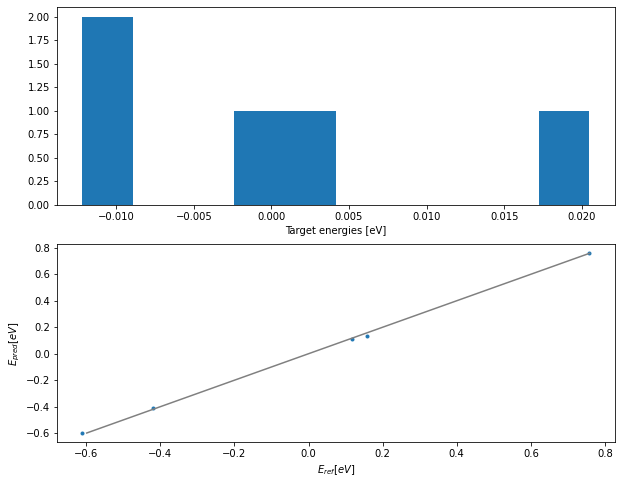

{'mae': 0.00964, 'max': 0.0205, 'mean deviation': 0.0, 'rmse': 0.01178}

In [ ]:
eval_driver(["data.hdf5", "more_testing/final_model", "more_testing/reference"], plot=True)#performance on more_testing data

{'mae': 0.00236, 'max': 0.00508, 'mean deviation': 0.0, 'rmse': 0.0029}


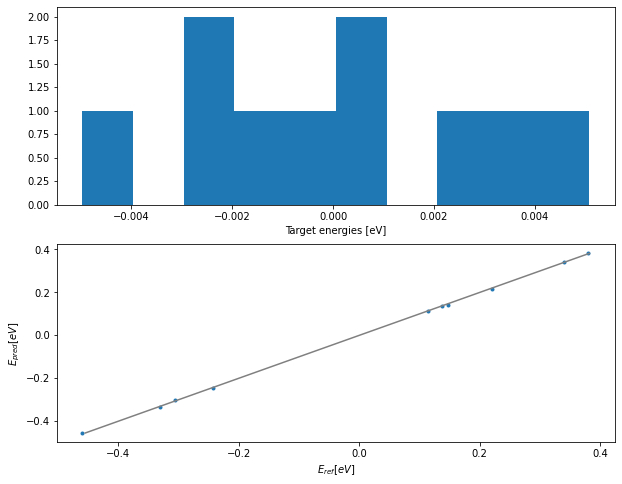

{'mae': 0.00236, 'max': 0.00508, 'mean deviation': 0.0, 'rmse': 0.0029}

In [ ]:
eval_driver(["sc/data.hdf5", "system/it0", "system/ref"], plot=True)#performance on trainging data after 1 iteration

In [ ]:
import h5py

In [ ]:
f = h5py.File('data.hdf5', 'r')

In [ ]:
np.array(f['more_testing/reference/energy']) #read reference energy from data.hdf5, does not match with more_testing.xyz

array([-0.41929806,  0.7568133 ,  0.15686876, -0.61070275,  0.11631875])

In [ ]:
np.array(f['more_testing/final_model/energy']) #nxc energies on the testing molecules

array([-0.4088407 ,  0.75827658,  0.13637018, -0.59851154,  0.11270549])

## read neural exchange correlation which is a TorchScript

In [ ]:
import torch

In [ ]:
xc = torch.jit.load("final_model.jit/xc_X")

In [ ]:
print(xc.code)

def forward(self,
    c: Tensor) -> Tensor:
  return (self.model).forward(c, )



In [ ]:
import pickle

In [ ]:
pipeline = pickle.load(open("final_model/pipeline.pckl","rb"))

In [ ]:
pipeline

[[('var_selector', GroupedVarianceThreshold(threshold=1e-10)),
  ('scaler', GroupedStandardScaler(threshold=None)),
  ('estimator',
   NetworkEstimator(activation='GeLU', alpha=0.001, b=0.001, batch_size=0,
            max_steps=20001, n_layers=0, n_nodes=4, valid_size=0))],
 {'X': {'basis': '/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/quickstart/quickstart-basis',
   'l': 5,
   'n': 7},
  'application': 'pyscf',
  'basis': {'file': '/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/quickstart/quickstart-basis'},
  'delta': False,
  'dfit': False,
  'extension': 'chkpt',
  'grad': 0,
  'grid': 'analytical',
  'operator': 'delta',
  'projector': 'gaussian',
  'projector_type': 'pyscf',
  'spec_agnostic': True},
 {'symmetrizer_type': 'trace'}]

In [ ]:
import ase.io

In [ ]:
ls

config.json             hyperparameters.json  testing/
config_with_model.json  more_testing.xyz      testing.xyz
data.hdf5               quickstart-basis      training_structures.xyz
final_model/            results.traj
final_model.jit/        sc/


In [ ]:
more_testing_results = ase.io.read("results.traj",index=":")

In [ ]:
for i in more_testing_results: #nxc energies on the testing molecules
    print(i.get_potential_energy(), i.get_potential_energy()*0.0367493) #convert to hartree

-2078.035265097308 -76.3663413676405
-2076.86814781097 -76.32345062434969
-2077.4900542141368 -76.34630524933158
-2078.2249359329994 -76.37331163808257
-2077.5137189075053 -76.34717491024759


`neuralxc data add` command seems to change the energies in results.traj and more_tetsing.xyz

## retry on 20 propane spec_agnostic: True

In [ ]:
pwd

'/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/quickstart'

In [ ]:
cd ../example_scripts/

/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts


In [ ]:
cp -r ../../../neuralxc_old/examples/example_scripts/train_model_20_propane/ .

In [ ]:
cd train_model_20_propane/

/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts/train_model_20_propane


In [ ]:
!sh train_20_propane.sh

cp: -r not specified; omitting directory '../workdir'
using unit 0.04336410390059322
using unit 0.04336410390059322
FILEPATH basis_sgdml_benzene.json
Traceback (most recent call last):
  File "../../../scripts/fix_paths.py", line 12, in <module>
    basis = json.load(open(path, 'r'))
FileNotFoundError: [Errno 2] No such file or directory: 'basis_sgdml_benzene.json'

====== Iteration 0 ======

Running SCF calculations ...
-----------------------------

converged SCF energy = -118.985059329835
converged SCF energy = -118.987204980336
converged SCF energy = -118.983042693749
converged SCF energy = -118.99598104807
converged SCF energy = -118.987741009125
converged SCF energy = -118.989522233165
converged SCF energy = -118.990655609566
converged SCF energy = -118.987395139792
converged SCF energy = -118.992027320202
converged SCF energy = -118.985179395939
converged SCF energy = -118.99016990482
converged SCF energy = -118.994902424432
converged SCF energy = -118.980943971746
converged SCF

## retry on 20 propane spec_agnostic: false

In [ ]:
cd ../train_model_10_propane_agnostic_false/

/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts/train_model_10_propane_agnostic_false


In [ ]:
!sh train_20_propane.sh

cp: -r not specified; omitting directory '../workdir'
using unit 0.04336410390059322
using unit 0.04336410390059322
FILEPATH basis_sgdml_benzene.json
Traceback (most recent call last):
  File "../../../scripts/fix_paths.py", line 12, in <module>
    basis = json.load(open(path, 'r'))
FileNotFoundError: [Errno 2] No such file or directory: 'basis_sgdml_benzene.json'

====== Iteration 0 ======

Running SCF calculations ...
-----------------------------

converged SCF energy = -118.985059329835
converged SCF energy = -118.987204980336
converged SCF energy = -118.983042693749
converged SCF energy = -118.99598104807
converged SCF energy = -118.987741009125
converged SCF energy = -118.989522233165
converged SCF energy = -118.990655609566
converged SCF energy = -118.987395139792
converged SCF energy = -118.992027320202
converged SCF energy = -118.985179395939

Projecting onto basis ...
-----------------------------

workdir/0/pyscf.chkpt
workdir/1/pyscf.chkpt
workdir/2/pyscf.chkpt
workdir/3/p

{'mae': 0.01725, 'max': 0.03816, 'mean deviation': -0.0, 'rmse': 0.02096}


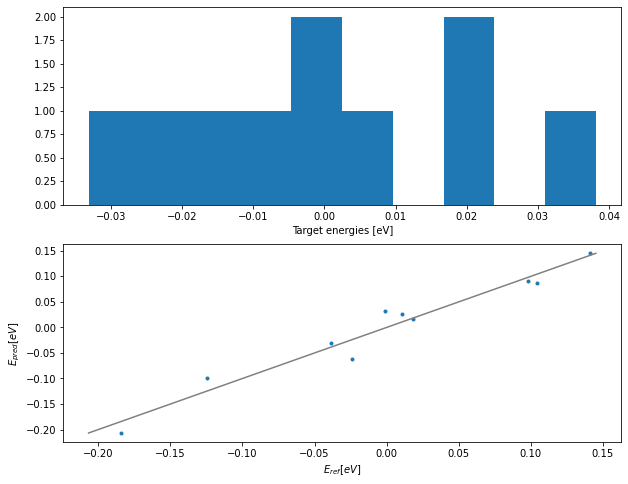

{'mae': 0.01725, 'max': 0.03816, 'mean deviation': -0.0, 'rmse': 0.02096}

In [ ]:
eval_driver(["workdir/sc/data.hdf5", "system/it0", "system/ref"], plot=True)#performance on trainging data after 1 iteration

## train on 20 methane test on 10 

In [ ]:
cd examples/example_scripts

/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts


In [ ]:
cd train_model_20methane_Cheng_ccsdt/

/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts/train_model_20methane_Cheng_ccsdt


In [ ]:
!sh train_20_CH4.sh

Streaming output truncated to the last 5000 lines.
Epoch 690 ||  Training loss : 0.015166  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 700 ||  Training loss : 0.015166  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 710 ||  Training loss : 0.015166  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 720 ||  Training loss : 0.015166  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 730 ||  Training loss : 0.015166  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 740 ||  Training loss : 0.015166  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 750 ||  Training loss : 0.015166  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 760 ||  Training loss : 0.015166  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 770 ||  Training loss : 0.015166  Validation loss : 0.000000  Learning rate: 1.0000000000000002

In [ ]:
cd ../train_model_20methane_pyscf_ccsdt/

/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts/train_model_20methane_pyscf_ccsdt


In [ ]:
!sh train_20_CH4.sh

Streaming output truncated to the last 5000 lines.
Epoch 690 ||  Training loss : 0.022128  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 700 ||  Training loss : 0.022128  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 710 ||  Training loss : 0.022128  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 720 ||  Training loss : 0.022128  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 730 ||  Training loss : 0.022128  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 740 ||  Training loss : 0.022128  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 750 ||  Training loss : 0.022128  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 760 ||  Training loss : 0.022128  Validation loss : 0.000000  Learning rate: 1.0000000000000002e-07
Epoch 770 ||  Training loss : 0.022128  Validation loss : 0.000000  Learning rate: 1.0000000000000002

## Train model_50_20_merge
5 iter

In [ ]:
cd examples/example_scripts/train_model_50_20_merge/

/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts/train_model_50_20_merge


In [ ]:
ls

basis_sgdml_benzene.json  test_subset.csv          train_subset_propane.csv
hyperparameters.json      train_50_20.sh           workdir/
README.txt                train_subset_ethane.csv


In [ ]:
!sh train_50_20.sh 

cp: -r not specified; omitting directory '../workdir'
using unit 0.04336410390059322
using unit 0.04336410390059322
/usr/local/lib/python3.7/dist-packages/ase/io/jsonio.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a = np.array(obj)
using unit 0.04336410390059322
FILEPATH basis_sgdml_benzene.json
Traceback (most recent call last):
  File "../../../scripts/fix_paths.py", line 13, in <module>
    basis['engine_kwargs']['pseudoloc'] = os.path.abspath(basis['engine_kwargs']['pseudoloc'])
KeyError: 'pseudoloc'
====== Iteration 0 ======
converged SCF energy = -79.6844271138828
converged SCF energy = -79.6943500665332
converged SCF energy = -79.6868898453716
converged SCF energy = -79.6922359554811
converged SCF energy = -79.6865586039518
converged SCF energy = -79.691

## Train model_50_20_merge_2
10 iter

In [ ]:
cd ..

/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts


In [ ]:
ls

train_model/  train_model_50/  train_model_50_20/  train_model_50_20_merge/


In [ ]:
cp -r train_model_50_20_merge train_model_50_20_merge_2

In [ ]:
cd train_model_50_20_merge_2

/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts/train_model_50_20_merge_2


In [ ]:
ls

basis_sgdml_benzene.json  test_subset.csv          train_subset_propane.csv
hyperparameters.json      train_50_20.sh           workdir/
README.txt                train_subset_ethane.csv


In [ ]:
!sh train_50_20.sh

Streaming output truncated to the last 5000 lines.
NeuralXC: Model successfully loaded
converged SCF energy = -79.6843901786287
NeuralXC: Loading model from /content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts/train_model_50_20_merge_2/workdir/sc/model_it2.jit
NeuralXC: Model successfully loaded
converged SCF energy = -79.6943131325923
NeuralXC: Loading model from /content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts/train_model_50_20_merge_2/workdir/sc/model_it2.jit
NeuralXC: Model successfully loaded
converged SCF energy = -79.6868532710639
NeuralXC: Loading model from /content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts/train_model_50_20_merge_2/workdir/sc/model_it2.jit
NeuralXC: Model successfully loaded
converged SCF energy = -79.6921987393529
NeuralXC: Loading model from /content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts/train_model_

## Train on 20 propane and test on the same 20 propanes

In [ ]:
cd examples/example_scripts

[Errno 2] No such file or directory: 'examples/example_scripts'
/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts/train_model_20_propane


In [ ]:
ls

basis.json            results.traj         train_subset_ethane.csv
hyperparameters.json  test_subset.csv      train_subset_propane.csv
README.txt            train_20_propane.sh  workdir/


In [ ]:
cd train_model_20_propane/

[Errno 2] No such file or directory: 'train_model_20_propane/'
/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc/examples/example_scripts/train_model_20_propane


In [ ]:
!sh train_20_propane.sh

cp: -r not specified; omitting directory '../workdir'
using unit 0.04336410390059322
using unit 0.04336410390059322
FILEPATH basis_sgdml_benzene.json
Traceback (most recent call last):
  File "../../../scripts/fix_paths.py", line 12, in <module>
    basis = json.load(open(path, 'r'))
FileNotFoundError: [Errno 2] No such file or directory: 'basis_sgdml_benzene.json'

====== Iteration 0 ======

Running SCF calculations ...
-----------------------------

Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results
Re-using results

Projecting onto basis ...
-----------------------------

workdir/0/pyscf.chkpt
workdir/1/pyscf.chkpt
workdir/2/pyscf.chkpt
Traceback (most recent call last):
  File "/usr/local/bin/neuralxc", line 7, in 

In [ ]:
!neuralxc engine basis_sgdml_benzene.json workdir/testing.traj --workdir ./tmp

Traceback (most recent call last):
  File "/usr/local/bin/neuralxc", line 7, in <module>
    exec(compile(f.read(), __file__, 'exec'))
  File "/content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/bin/neuralxc", line 240, in <module>
    func(**args_dict)
  File "/content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/neuralxc/drivers/other.py", line 97, in run_engine_driver
    pre = make_nested_absolute(ConfigFile(preprocessor))
  File "/content/drive/MyDrive/MSc_Project/neural_xc_playground/neuralxc/neuralxc/utils/config.py", line 151, in __init__
    content = json.loads(open(content, 'r').read())
FileNotFoundError: [Errno 2] No such file or directory: 'basis_sgdml_benzene.json'


## Task: get projection out

### `neural xc pre ...` seems to do the job

In [ ]:
!neuralxc pre basis_sgdml_benzene.json --srcdir ./tmp --dest ./tmp --xyz workdir/testing.traj

======Projecting onto basis sets======
BI {'basis': 'ccpvtz-jkfit', 'extension': 'chkpt', 'application': 'pyscf', 'spec_agnostic': False, 'C': {'n': 10, 'l': 5}, 'H': {'n': 4, 'l': 4}}
./tmp/0/pyscf.chkpt
./tmp/1/pyscf.chkpt
./tmp/2/pyscf.chkpt
./tmp/3/pyscf.chkpt
./tmp/4/pyscf.chkpt
./tmp/5/pyscf.chkpt
./tmp/6/pyscf.chkpt
./tmp/7/pyscf.chkpt
./tmp/8/pyscf.chkpt
./tmp/9/pyscf.chkpt
./tmp/10/pyscf.chkpt
./tmp/11/pyscf.chkpt
./tmp/12/pyscf.chkpt
./tmp/13/pyscf.chkpt
./tmp/14/pyscf.chkpt
./tmp/15/pyscf.chkpt
./tmp/16/pyscf.chkpt
./tmp/17/pyscf.chkpt
./tmp/18/pyscf.chkpt
./tmp/19/pyscf.chkpt


In [ ]:
test_pre = np.load(".tmp/540fffd922b6f0cbee81e4c1c80c7dfa.npy")

In [ ]:
test_pre

array([[ 1.75093776e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.06849315e-04,  2.35582319e-03, -5.02244948e-02],
       [ 1.75063416e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.12710913e-02, -3.75379073e-02, -3.70123750e-02],
       [ 1.75087629e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.32885384e-02,  8.95267630e-02,  5.28164416e-02],
       ...,
       [ 1.75051993e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.81710922e-02,  3.76717721e-02,  2.99026083e-02],
       [ 1.75092086e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.50714538e-02, -7.12436218e-03,  4.84704325e-02],
       [ 1.75051101e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.98489089e-02, -9.68339061e-02, -4.01309898e-02]])

In [ ]:
test_pre.shape

(20, 1262)

#### TODO: figure out why 1262?

In [ ]:
(1+4+9+16+25+25+25+25+25+25)*3 + (1+4+9+16)*8

780

propane C3H8 

In [ ]:
test_pre[0]

array([ 1.75093776e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -1.06849315e-04,  2.35582319e-03, -5.02244948e-02])

### import drivers from neuralxc.drivers
`pre_driver()` function does the same job as `nerualxc pre ...`

In [ ]:
from neuralxc.drivers.other import pre_driver

In [ ]:
pre_driver("examples/example_scripts/train_model_20_propane/workdir/testing.traj",
           "examples/example_scripts/train_model_20_propane/tmp",
           "examples/example_scripts/train_model_20_propane/basis_sgdml_benzene.json")

======Projecting onto basis sets======
BI {'basis': 'ccpvtz-jkfit', 'extension': 'chkpt', 'application': 'pyscf', 'spec_agnostic': False, 'C': {'n': 10, 'l': 5}, 'H': {'n': 4, 'l': 4}}
examples/example_scripts/train_model_20_propane/tmp/0/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/1/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/2/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/3/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/4/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/5/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/6/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/7/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/8/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/9/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/10/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/11/pyscf.chkpt
examples/example_scri

In [ ]:
test_pre2 = np.load(".tmp/540fffd922b6f0cbee81e4c1c80c7dfa.npy")

In [ ]:
np.array_equal(test_pre,test_pre2)

True

### tried to change n and l 
though it doesn't seem to work. After ruuning `pre_driver()`, "pre.json" get overwritten

In [ ]:
#changed n=4,l=4 for C
pre_driver("examples/example_scripts/train_model_20_propane/workdir/testing.traj",
           "examples/example_scripts/train_model_20_propane/tmp",
           "../pre.json")

======Projecting onto basis sets======
BI {'basis': 'ccpvtz-jkfit', 'extension': 'chkpt', 'application': 'pyscf', 'spec_agnostic': False, 'C': {'n': 4, 'l': 4}, 'H': {'n': 4, 'l': 4}}
examples/example_scripts/train_model_20_propane/tmp/0/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/1/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/2/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/3/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/4/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/5/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/6/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/7/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/8/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/9/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/10/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/11/pyscf.chkpt
examples/example_scrip

In [ ]:
test_pre3 = np.load(".tmp/540fffd922b6f0cbee81e4c1c80c7dfa.npy")

In [ ]:
np.array_equal(test_pre,test_pre3)

True

In [ ]:
pwd

'/content/drive/My Drive/MSc_Project/neural_xc_playground/neuralxc'

In [ ]:
#changed n=1,l=1 for C and H
pre_driver("examples/example_scripts/train_model_20_propane/workdir/testing.traj",
           "examples/example_scripts/train_model_20_propane/tmp",
           "../pre.json")

======Projecting onto basis sets======
BI {'basis': 'ccpvtz-jkfit', 'extension': 'chkpt', 'application': 'pyscf', 'spec_agnostic': False, 'C': {'n': 1, 'l': 1}, 'H': {'n': 1, 'l': 1}}
examples/example_scripts/train_model_20_propane/tmp/0/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/1/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/2/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/3/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/4/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/5/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/6/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/7/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/8/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/9/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/10/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/11/pyscf.chkpt
examples/example_scrip

In [ ]:
test_pre4 = np.load(".tmp/540fffd922b6f0cbee81e4c1c80c7dfa.npy")

In [ ]:
np.array_equal(test_pre,test_pre3)

True

#### go through `pre_driver()` line by line

In [ ]:
preprocessor_path = "../pre.json"

`make_nested_absolute()` is in neuralxc.formatter

In [ ]:
from neuralxc.formatter import *

In [ ]:
import json

In [ ]:
pre = make_nested_absolute(json.loads(open("../pre.json", 'r').read()))

In [ ]:
pre

{'engine_kwargs': {'basis': 'ccpvdz', 'xc': 'PBE'},
 'n_workers': 1,
 'preprocessor': {'C': {'l': 5, 'n': 10},
  'H': {'l': 4, 'n': 4},
  'application': 'pyscf',
  'basis': 'ccpvtz-jkfit',
  'extension': 'chkpt',
  'spec_agnostic': False}}

In [ ]:
from ase.io import read

In [ ]:
atoms = read("examples/example_scripts/train_model_20_propane/workdir/testing.traj", ':')

In [ ]:
atoms

[Atoms(symbols='C2H5CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H5CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H5CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H5CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H5CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H5CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H5CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H5CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H5CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H5CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H5CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H5CH3', pbc=False, calculator=SinglePointCalculator(...)),
 Atoms(symbols='C2H5CH3', pbc=False, calculator=SinglePointCalculator(...)),

In [ ]:
atoms[0].positions

array([[ 1.25991742, -1.19954342,  1.41354126],
       [ 2.13037387, -0.57736755,  0.21461351],
       [ 0.86798119, -0.41870608,  2.04738686],
       [ 1.74387902, -1.90588774,  1.96012759],
       [ 0.3011863 , -1.61970725,  1.05809014],
       [ 2.90968884,  0.0927169 ,  0.59594325],
       [ 1.47191602,  0.10321607, -0.42808757],
       [ 2.72913521, -1.59525051, -0.75344542],
       [ 3.54174583, -2.16964612, -0.17017267],
       [ 3.23082184, -1.04979412, -1.52984522],
       [ 2.00499249, -2.2991183 , -1.25418812]])

In [ ]:
from neuralxc.ml.utils import get_preprocessor

In [ ]:
preprocessor = get_preprocessor(pre, atoms, "examples/example_scripts/train_model_20_propane/tmp")

In [ ]:
preprocessor.basis_instructions

{'C': {'l': 5, 'n': 10},
 'H': {'l': 4, 'n': 4},
 'application': 'pyscf',
 'basis': 'ccpvtz-jkfit',
 'extension': 'chkpt',
 'spec_agnostic': False}

In [ ]:
from neuralxc.ml.utils import get_basis_grid

In [ ]:
basis_grid = get_basis_grid(pre)['preprocessor__basis_instructions']

???  basis_grid is pretty much the same as preprocessor.basis_instructions 

In [ ]:
basis_grid

[{'C': {'l': 5, 'n': 10},
  'H': {'l': 4, 'n': 4},
  'application': 'pyscf',
  'basis': 'ccpvtz-jkfit',
  'extension': 'chkpt',
  'spec_agnostic': False}]

In [ ]:
basis_instr = basis_grid[0]

In [ ]:
preprocessor.basis_instructions = basis_instr

In [ ]:
 print('BI', basis_instr)

BI {'basis': 'ccpvtz-jkfit', 'extension': 'chkpt', 'application': 'pyscf', 'spec_agnostic': False, 'C': {'n': 10, 'l': 5}, 'H': {'n': 4, 'l': 4}}


In [ ]:
basis_instr.get('application', 'siesta')

'pyscf'

In [ ]:
from neuralxc.drivers.other import get_real_basis

In [ ]:
real_basis = get_real_basis(atoms,basis_instr['basis'],spec_agnostic=basis_instr.get('spec_agnostic', False))

In [ ]:
real_basis

{'C': {'l': 5, 'n': 10}, 'H': {'l': 4, 'n': 4}}

In [ ]:
real_basis.keys()

dict_keys(['C', 'H'])

#### The line below overwrites `basis_instr` whic is read from user-provided input

In [ ]:
for key in real_basis:
    basis_instr[key] = real_basis[key]

In [ ]:
pre.update({'preprocessor': basis_instr})

In [ ]:
pre

{'engine_kwargs': {'basis': 'ccpvdz', 'xc': 'PBE'},
 'n_workers': 1,
 'preprocessor': {'C': {'l': 5, 'n': 10},
  'H': {'l': 4, 'n': 4},
  'application': 'pyscf',
  'basis': 'ccpvtz-jkfit',
  'extension': 'chkpt',
  'spec_agnostic': False}}

#### `preprocessor.fit_transform(None)` seems to be the method that we need to figure out next!!!

In [ ]:
data = preprocessor.fit_transform(None)

examples/example_scripts/train_model_20_propane/tmp/0/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/1/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/2/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/3/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/4/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/5/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/6/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/7/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/8/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/9/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/10/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/11/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/12/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/13/pyscf.chkpt
examples/example_scripts/train_model_20_propane/tmp/14/pyscf.chkpt
examp

In [ ]:
data

array([[ 1.75093776e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.06849315e-04,  2.35582319e-03, -5.02244948e-02],
       [ 1.75063416e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.12710913e-02, -3.75379073e-02, -3.70123750e-02],
       [ 1.75087629e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.32885384e-02,  8.95267630e-02,  5.28164416e-02],
       ...,
       [ 1.75051993e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.81710922e-02,  3.76717721e-02,  2.99026083e-02],
       [ 1.75092086e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.50714538e-02, -7.12436218e-03,  4.84704325e-02],
       [ 1.75051101e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.98489089e-02, -9.68339061e-02, -4.01309898e-02]])

In [ ]:
data.shape

(20, 1262)

Investiaging `preprocessor` object leads to:

`get_preprocessor()` in `neuralxc/ml/utils.py`

which then leads to 

`Preprocessor` class in `neuralxc/preprocessor/preprocessor.py`

which leads to


`DensityProjector()` in `neuralxc/projector/projector.py`

In [ ]:
import h5py

In [ ]:
f = h5py.File("workdir/testing/data.hdf5", "r")

In [ ]:
f.keys()

<KeysViewHDF5 ['system']>

In [ ]:
list(f['system'])

['it0', 'ref', 'testing']

In [ ]:
list(f['system']['it0']['density'])

['540fffd922b6f0cbee81e4c1c80c7dfa']

In [ ]:
list(f['system']['it0']['energy'])

[0.10226966514346714,
 0.039626753764423484,
 0.15792664630362196,
 -0.20108776160122943,
 0.021907554097651882,
 -0.018725369080584642,
 -0.051604822480840085,
 0.03901253773119606,
 -0.08694773404067746,
 0.10049447554138169,
 -0.04182985434999864,
 -0.16976948681258364,
 0.21459703824666576,
 -0.07165824658704878,
 -0.16000632735449472,
 0.050760118499965756,
 0.1796901350612643,
 -0.09989474409803734,
 0.050183174743324344,
 -0.05494375272974139]

In [ ]:
list(f['system']['ref']['energy'])

[0.10550690699938059,
 0.006440664167257637,
 0.14910719306271858,
 -0.17694527238290902,
 0.025851356377643242,
 -0.0311490537451391,
 -0.016132461960751243,
 0.018089817258442054,
 -0.1169276492832978,
 0.11217311358223014,
 -0.011145042170483066,
 -0.18532556012951318,
 0.21620274688575591,
 -0.06451687403523465,
 -0.17053774719624926,
 0.04993273920445063,
 0.2065744226656534,
 -0.0954033824173166,
 0.041813624193309806,
 -0.06360954108640726]

In [ ]:
list(f['system']['testing']['nxc']['energy'])

[0.10226966514346714,
 0.039626753764423484,
 0.15792664630362196,
 -0.20108776160122943,
 0.021907554097651882,
 -0.018725369080584642,
 -0.051604822480840085,
 0.03901253773119606,
 -0.08694773404067746,
 0.10049447554138169,
 -0.04182985434999864,
 -0.16976948681258364,
 0.21459703824666576,
 -0.07165824658704878,
 -0.16000632735449472,
 0.050760118499965756,
 0.1796901350612643,
 -0.09989474409803734,
 0.050183174743324344,
 -0.05494375272974139]

In [ ]:
list(f['system']['testing']['ref']['energy'])

[0.10550690699938059,
 0.006440664167257637,
 0.14910719306271858,
 -0.17694527238290902,
 0.025851356377643242,
 -0.0311490537451391,
 -0.016132461960751243,
 0.018089817258442054,
 -0.1169276492832978,
 0.11217311358223014,
 -0.011145042170483066,
 -0.18532556012951318,
 0.21620274688575591,
 -0.06451687403523465,
 -0.17053774719624926,
 0.04993273920445063,
 0.2065744226656534,
 -0.0954033824173166,
 0.041813624193309806,
 -0.06360954108640726]